# 获取数据

In [1]:
import akshare as ak
# 读入中国平安 「000001」 2022-06-01 到 2022-12-01 日收盘价数据
df = ak.stock_zh_a_hist(symbol="600519", period="daily", start_date="20230301", end_date='20240301', adjust="")
print(df.head())

C:\Users\ZhouXunZhe\AppData\Roaming\Python\Python39\site-packages\akshare\__init__.py:2716: UserWarning: 为了支持更多特性，请将 Pandas 升级到 2.1.0 及以上版本！
  warnings.warn(


           日期       开盘       收盘       最高       最低    成交量           成交额    振幅  \
0  2023-03-01  1813.00  1838.53  1848.00  1803.23  24458  4.475592e+09  2.47   
1  2023-03-02  1829.00  1828.00  1838.99  1821.10  13144  2.405292e+09  0.97   
2  2023-03-03  1839.77  1818.04  1841.61  1802.48  16198  2.946843e+09  2.14   
3  2023-03-06  1818.18  1807.14  1818.50  1796.77  20646  3.730080e+09  1.20   
4  2023-03-07  1805.98  1788.30  1816.60  1788.00  22785  4.101302e+09  1.58   

    涨跌幅    涨跌额   换手率  
0  1.37  24.79  0.19  
1 -0.57 -10.53  0.10  
2 -0.54  -9.96  0.13  
3 -0.60 -10.90  0.16  
4 -1.04 -18.84  0.18  


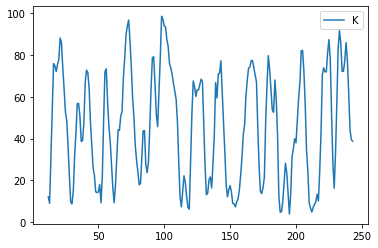

In [51]:
import talib
import matplotlib.pyplot as plt
# 计算KDJ指标
K,D = talib.STOCH(df['最高'],df['最低'],df['收盘'],fastk_period=9, slowk_period=3, slowd_period=3)
J = 3*K - 2*D
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制KDJ指标
ax.plot(K,label='K')
# ax.plot(D,label='D')
# ax.plot(J,label='J')

plt.legend()  # 显示图例
plt.show()

In [8]:
print(K)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
239    77.475663
240    61.788840
241    44.262268
242    39.478104
243    38.746143
Length: 244, dtype: float64


# 数据分析

In [23]:
# 对数正态分布
from scipy import stats
import numpy as np

log_K = np.log(K)
log_K = log_K[np.isfinite(log_K)]
print(log_K)

log_mean, log_std = stats.norm.fit(log_K)

print(f'拟合的对数正态分布参数：均值={log_mean}, 标准差={log_std}')

12     2.494639
13     2.199745
14     3.430451
15     3.956114
16     4.329512
         ...   
239    4.349964
240    4.123723
241    3.790133
242    3.675746
243    3.657031
Length: 232, dtype: float64
拟合的正态分布参数：均值=3.5932417258542104, 标准差=0.7746336888375688


In [22]:
# 正态分布
print(K[np.isfinite(K)])

mean, std = stats.norm.fit(K[np.isfinite(K)])

print(f'拟合的正态分布参数：均值={mean}, 标准差={std}')

12     12.117352
13      9.022715
14     30.890570
15     52.253885
16     75.907250
         ...    
239    77.475663
240    61.788840
241    44.262268
242    39.478104
243    38.746143
Length: 232, dtype: float64
拟合的正态分布参数：均值=46.10846348531959, 标准差=26.264354234229664


# 自回归拟合

In [40]:
# 自回归模型拟合并预测(对数)
import statsmodels.api as sm

log_K = np.log(K)
data = log_K[np.isfinite(log_K)]

# 拟合AR模型
model = sm.tsa.AutoReg(data, lags=1)
model_fit = model.fit()

# 进行预测
preds = model_fit.predict(start=len(data), end=len(data))
print(f"下一时间点的预测值: {preds.iloc[0]}") 

# 使用模型残差估计标准差
residuals = model_fit.resid
std_error = np.std(residuals)
print(f"预测值的标准差（估计）: {std_error}")

下一时间点的预测值: 3.6537631550211143
预测值的标准差（估计）: 0.37524054155549846


c:\Program Files\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Program Files\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [43]:
# 自回归模型拟合并预测
data = K[np.isfinite(K)]

# 拟合AR模型
model = sm.tsa.AutoReg(data, lags=1)
model_fit = model.fit()

# 进行预测
preds = model_fit.predict(start=len(data), end=len(data))
print(f"下一时间点的预测值: {preds.iloc[0]}") 

# 使用模型残差估计标准差
residuals = model_fit.resid
std_error = np.std(residuals)
print(f"预测值的标准差（估计）: {std_error}")

下一时间点的预测值: 39.57694780905261
预测值的标准差（估计）: 11.07993216573449


c:\Program Files\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Program Files\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# 卡尔曼滤波

In [50]:
from pykalman import KalmanFilter
import numpy as np

data = K[np.isfinite(K)]

# 初始化卡尔曼滤波器
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# 使用观察数据估计滤波器参数
kf = kf.em(data, n_iter=5)

# 使用滤波器进行状态估计
(mean, std) = kf.filter(data)

# 使用滤波器进行一步预测
next_mean, next_cov = kf.filter_update(mean[-1], std[-1], observation=None)

print(f"下一时间点的预测值: {next_mean[0]}")
print(f"预测值的标准差（估计）: {np.sqrt(next_cov[0][0])}")

下一时间点的预测值: 38.852158561806654
预测值的标准差（估计）: 12.123971017564722
